### ニューラルネットワーク

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn as mg
%matplotlib inline

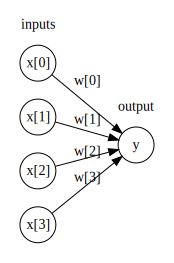

In [2]:
display(mg.plots.plot_logistic_regression_graph())

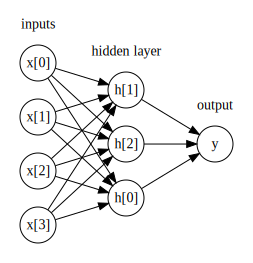

In [3]:
display(mg.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x), tanh(x)')

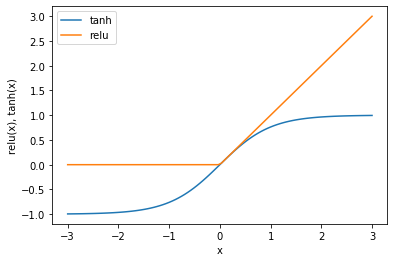

In [4]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

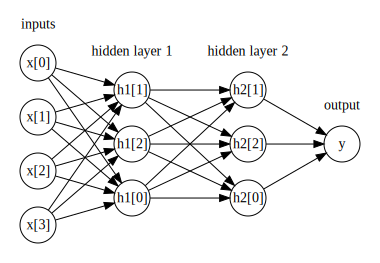

In [5]:
mg.plots.plot_two_hidden_layer_graph()

Text(0, 0.5, 'Feature 1')

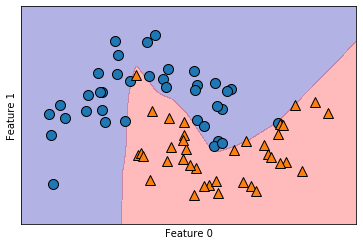

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mlp = MLPClassifier(solver="lbfgs", random_state=0).fit(X_train, y_train)
mg.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3)
mg.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

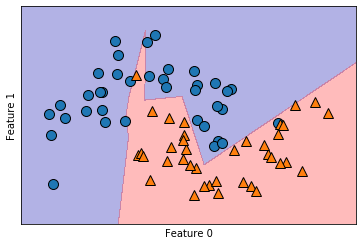

In [11]:
mlp = MLPClassifier(solver="lbfgs", random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mg.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = 0.3)
mg.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

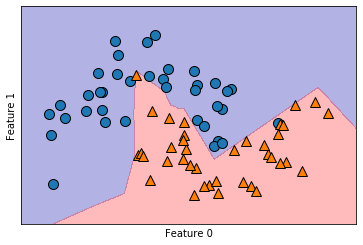

In [13]:
mlp = MLPClassifier(solver='lbfgs', random_state = 0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mg.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = 0.3)
mg.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

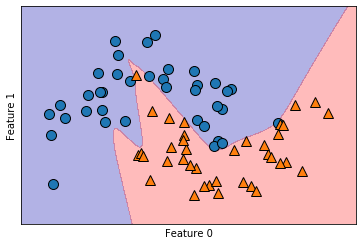

In [14]:
mlp = MLPClassifier(solver="lbfgs", activation="tanh", random_state=0, hidden_layer_sizes=[10,10])
mlp.fit(X_train, y_train)

mg.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = 0.3)
mg.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

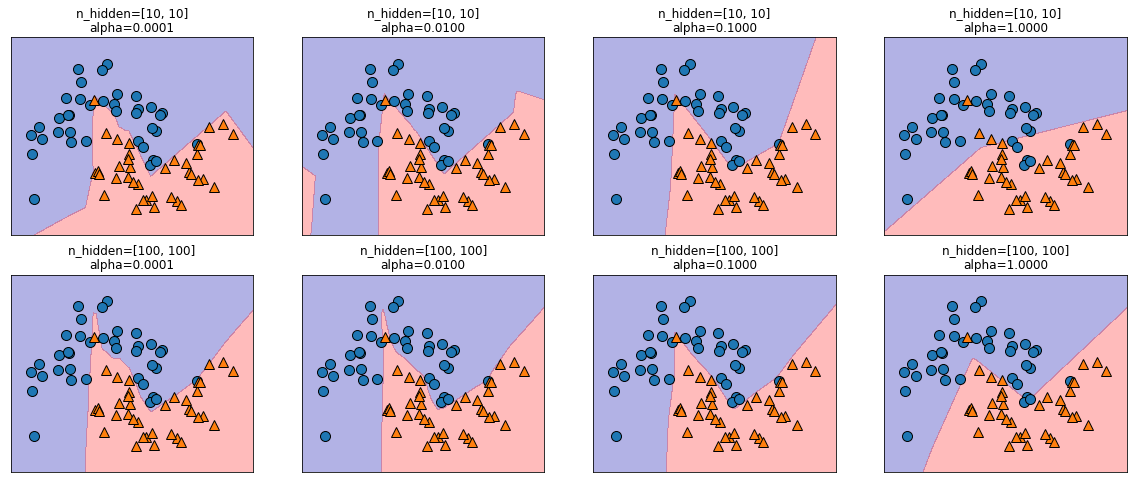

In [18]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver="lbfgs", random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha = alpha)
        mlp.fit(X_train, y_train)
        mg.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = 0.3, ax = ax)
        mg.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax = ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

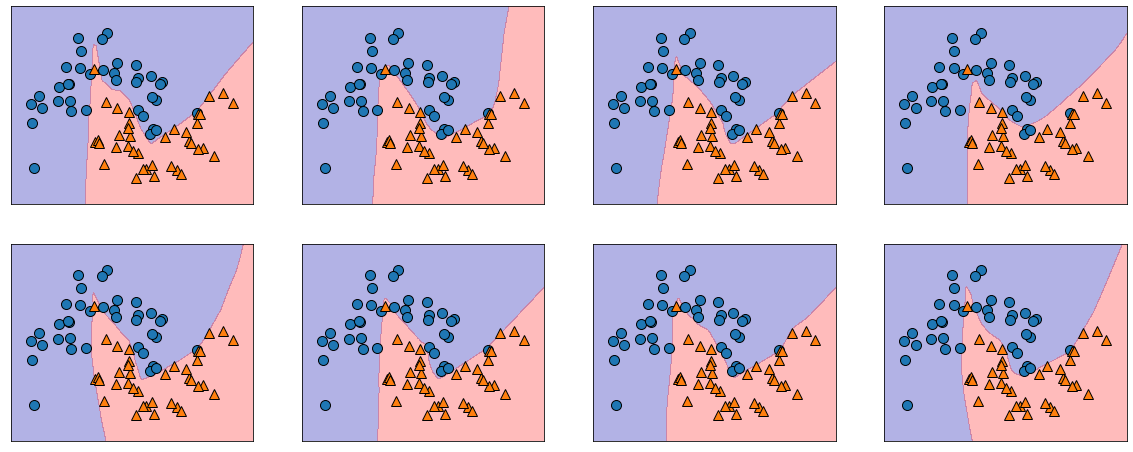

In [19]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver="lbfgs", random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mg.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = 0.3, ax = ax)
    mg.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax = ax)

In [22]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [24]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set:{:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set:{:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set:0.94
Accuracy on test set:0.92


In [25]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set:{:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on training set:{:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set:0.991
Accuracy on training set:0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [26]:
mlp = MLPClassifier(random_state=0, max_iter=1000)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set:{:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on training set:{:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set:1.000
Accuracy on training set:0.972


In [27]:
mlp = MLPClassifier(random_state=0, max_iter=1000, alpha=1)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set:{:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on training set:{:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set:0.988
Accuracy on training set:0.972


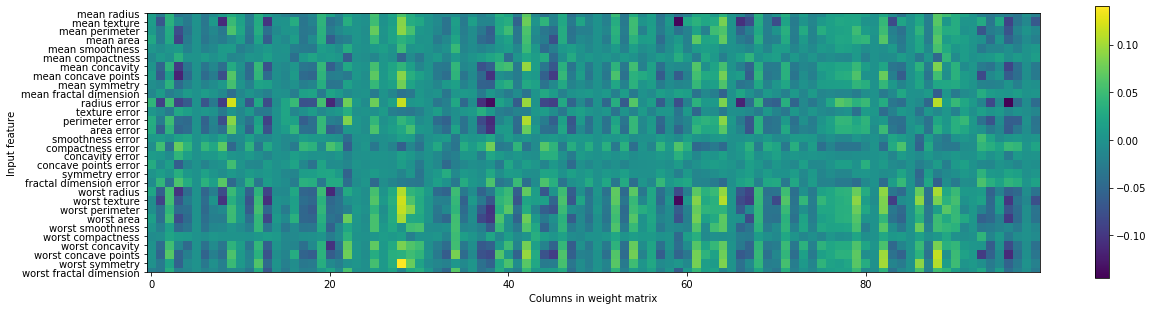

In [29]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

* より柔軟で、大きなモデルを使う場合はscikit-learnではなくて、Keras,lasagna, tensor-flowを使うべき。
* lasagnaはtheanoを用いて構築されているが、kerasはtensor-flow, theanoのどちらも利用できる　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　
* 高度なGPUを使うべき。これを用いると、計算を１０倍から１００倍高速にできる。

#### 利点・欠点
* 大量のデータに含まれているデータを費やし、複雑なモデルを構築できる。十分な計算時間とデータをかけ、慎重にパラメータを調整すれば、他のアルゴリズムを上回ることができる。
* 訓練に時間がかかる。（前処理が必要）

#### 複雑さの推定
* 隠れ層の数と、層あたりの隠れ層ユニットの数
* モデルの複雑さを考えるなら、学習すべき重み・係数の数が一つの尺度

#### パラメータ調整
* まず過剰適合できるように大きいネットワークを作り、次にαを増やして正則化を強化して、汎化性能を向上させる。

#### アルゴリズム
* デフォルトは**Adam**はほとんどのケースでよく機能する。データのスケールにはとても敏感（データの平均は０、分散を1にしておくことが重要になる）
* **lbfgs**は頑健だが、モデルが大きい場合は、大規模なデータセットに対しては、訓練に時間がかかる。
* **sgd**はより高度である。さらに多くの設定パラメータがある。